In [ ]:
import random

random.seed(1)

N_1 = 4
# body = []
# for i in range(N_1):
#     body.append([random.randint(-100, 100), random.randint(-100, 100), random.randint(-10, 10) * 10 ** -4, 1, 0, 0]) # (x_0, y_0, q, m, v_x0, v_y0)

body = [[3, -5, -10 ** -4, 1, 0, 0], [-10, 6, 10 ** -4, 1, 0, 0], [10, -7, 10 ** -4, 1, 0, 0], [4, 3, -10 ** -4, 1, 0, 0]] # (x_0, y_0, q, m, v_x0, v_y0)

sigma = 1
ep = 1

N_2 = 0
inf = []

time = 0.01
echos = 1000000

history_x = [[0 for i in range(echos + 1)] for i in range(N_1)]
history_y = [[0 for i in range(echos + 1)] for i in range(N_1)]

v = [] # velosity

i = 0
for elem in body:
    v.append([elem[4], elem[5]])
    history_x[i][0] = elem[0]
    history_y[i][0] = elem[1]
    i += 1
 
# print(history_x, history_y, v, sep="\n\n")

In [ ]:
def acceleration(x, y, n, echos):
    a = [0, 0]
    q, m = body[n][2:4]
    # print(q, m)
    for i in range(N_1):
        if i != n:
            x_i, y_i, q_i = history_x[i][echos - 1], history_y[i][echos - 1], body[i][2]
            lenth_v = [x - x_i, y - y_i]
            lenth = (lenth_v[0] ** 2 + lenth_v[1] ** 2) ** (1 / 2)
            # print(lenth_v, x, y, x_i, y_i, q_i)
            a_i = (9 * 10 ** 9 * q * q_i) / (lenth ** 2 * m)
            # a_i = 24 * ep * sigma ** 6 * (lenth ** -7 - 2 * sigma ** 6 * lenth ** -13) / m
            a_i_x = a_i * lenth_v[0] / lenth
            a_i_y = a_i * lenth_v[1] / lenth
            a[0] += a_i_x
            a[1] += a_i_y
       
    return a
 
 
print(acceleration(1, 1, 0, 1))

[-5.857623774157488, -3.997511882984486]


In [ ]:
def step(i):
    for n in range(N_1):
        x, y = history_x[n][i - 1], history_y[n][i - 1]
 
        a = acceleration(x, y, n, i)
        # print('1 ---- ', a, x, y, n, i)
 
        x += v[n][0] * time + a[0] * time ** 2 / 2
        y += v[n][1] * time + a[1] * time ** 2 / 2
        
        # print('2 ---- ', v, v[n])
 
        v[n][0] += a[0] * time
        v[n][1] += a[1] * time
 
        history_x[n][i] = x
        history_y[n][i] = y
        # print('3 ---- ', history_x, history_y, v, sep='\n')
        # print()

In [ ]:
for i in range(1, echos + 1, 1):
    step(i)
    
# print(history_x, history_y, v, sep='\n')

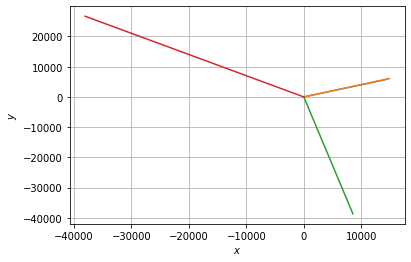

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.plot(history_x[0], history_y[0], history_x[1], history_y[1], history_x[2], history_y[2], history_x[3], history_y[3])